In [1]:
#imports
import os, sys
sys.path.append('/home/asigorskikh/new_scripts/')
from DB_scripts import *

import warnings
warnings.filterwarnings("ignore")
DIR = "/mnt/scratch/rnachrom/"
os.chdir(DIR)

# iMARGI

### First paper

In [2]:
curdir = DIR + 'data/imargi/'
os.chdir(curdir)
#restriction sites and fastuniq already done

In [3]:
names = list(set([x.split('_')[0] for x in os.listdir('fastuniq/') if '.fastq' in x]))

In [18]:
#data gunzip
os.chdir('fastuniq')
for x in [x for x in os.listdir('.') if '.fastq.gz' in x]:
    os.system('gunzip {}'.format(x))
os.chdir('..')

In [3]:
#trim

for name in names:
    
    file1_fastuniq = curdir + 'fastuniq/{}_1.fastq'.format(name)
    file2_fastuniq = curdir + 'fastuniq/{}_2.fastq'.format(name)
    
    file1_trim = curdir + 'trimmed/{}.forward.fastq'.format(name)
    file2_trim = curdir + 'trimmed/{}.reverse.fastq'.format(name)

    run_trimmomatic(file1_fastuniq, file2_fastuniq, file1_trim, file2_trim,
                  window=5, 
                  qual_th=26, 
                  minlen=14 
                  )

b'TrimmomaticPE: Started with arguments:\n -phred33 /mnt/scratch/rnachrom/data/imargi/fastuniq/SRR8206680_1.fastq /mnt/scratch/rnachrom/data/imargi/fastuniq/SRR8206680_2.fastq /mnt/scratch/rnachrom/data/imargi/trimmed/SRR8206680.forward.fastq /mnt/scratch/rnachrom/data/imargi/trimmed/SRR8206680.forward.fastq.unpaired /mnt/scratch/rnachrom/data/imargi/trimmed/SRR8206680.reverse.fastq /mnt/scratch/rnachrom/data/imargi/trimmed/SRR8206680.reverse.fastq.unpaired SLIDINGWINDOW:5:26 MINLEN:14\nMultiple cores found: Using 4 threads\nInput Read Pairs: 108657853 Both Surviving: 94855274 (87.30%) Forward Only Surviving: 11537370 (10.62%) Reverse Only Surviving: 1269966 (1.17%) Dropped: 995243 (0.92%)\nTrimmomaticPE: Completed successfully\n'
b'TrimmomaticPE: Started with arguments:\n -phred33 /mnt/scratch/rnachrom/data/imargi/fastuniq/SRR8206679_1.fastq /mnt/scratch/rnachrom/data/imargi/fastuniq/SRR8206679_2.fastq /mnt/scratch/rnachrom/data/imargi/trimmed/SRR8206679.forward.fastq /mnt/scratch/rna

In [ ]:
#align
#names = list(set([x.split('.')[0] for x in os.listdir('trimmed/') if '.fastq' in x]))
for name in names:
    align(infile=curdir+f'trimmed/{name}.reverse.fastq', outfile=curdir+f'sam/{name}.dna.bam',\
         mode='dna', genome=DIR+'data/genomes/hg38/GRCh38.p13', nthreads=8)
    align(infile=curdir+f'trimmed/{name}.forward.fastq', outfile=curdir+f'sam/{name}.rna.bam',\
         mode='rna', genome=DIR+'data/genomes/hg38/GRCh38.p13', nthreads=8,\
         known_splice=DIR+'data/genes/human/gencode.v35.basic.annotation.ss', novel_splice=curdir+f'bam/{name}.rna.novel_splice')

In [33]:
names

['SRR9900120', 'SRR9900121', 'SRR9900122']

In [ ]:
for name in names:
    filter_aligned(curdir+'sam/{}.dna.bam'.format(name), curdir+'bam/{}.dna.bam'.format(name))
    filter_aligned(curdir+'sam/{}.rna.bam'.format(name), curdir+'bam/{}.rna.bam'.format(name))

In [19]:
for x,y in itertools.product(names, ['rna', 'dna']):
    aligned_to_bed(infile=curdir+'bam/{0}.{1}.bam'.format(x,y), outfile=curdir+'bed/{0}.{1}.bed'.format(x,y), mode='mapped')

b''
b''
b''
b''


In [ ]:
extract_contacts(ids_rna=names, ids_dna=names, indir=curdir+'bed', outdir=curdir+'contacts')

### Second paper

In [29]:
curdir = DIR + 'data/imargi/'
os.chdir(curdir)
# cleaning and fastuniq done on makarych

In [30]:
#names = ["SRR12462453", "SRR12462454"]
names = ["SRR9900120", "SRR9900121", "SRR9900122"]

In [ ]:
#trim
for name in names: 
    file1_fastuniq = curdir + 'fastuniq/clean_{}_1.fastq'.format(name)
    file2_fastuniq = curdir + 'fastuniq/clean_{}_2.fastq'.format(name)
    
    file1_trim = curdir + 'trimmed/{}.forward.fastq'.format(name)
    file2_trim = curdir + 'trimmed/{}.reverse.fastq'.format(name)

    run_trimmomatic(file1_fastuniq, file2_fastuniq, file1_trim, file2_trim,
                  window=5, 
                  qual_th=26, 
                  minlen=14 
                  )

In [ ]:
for name in names:
    align(infile=curdir+f'trimmed/{name}.reverse.fastq', outfile=curdir+f'sam/{name}.dna.bam',\
         mode='dna', genome=DIR+'data/genomes/hg38/GRCh38.p13', nthreads=8)
    align(infile=curdir+f'trimmed/{name}.forward.fastq', outfile=curdir+f'sam/{name}.rna.bam',\
         mode='rna', genome=DIR+'data/genomes/hg38/GRCh38.p13', nthreads=8,\
         known_splice=DIR+'data/genes/human/gencode.v35.basic.annotation.ss', novel_splice=curdir+f'bam/{name}.rna.novel_splice')

In [ ]:
for name in names:
    filter_aligned(curdir+f'sam/{name}.dna.bam', curdir+f'bam/{name}.dna.bam')
    filter_aligned(curdir+f'sam/{name}.rna.bam', curdir+f'bam/{name}.rna.bam')

In [ ]:
for x,y in itertools.product(names, ['rna', 'dna']):
    aligned_to_bed(infile=curdir+f'bam/{x}.{y}.bam', outfile=curdir+f'bed/{x}.{y}.bed', mode='mapped')

In [23]:
hg38_dict = {'NC_000001.11': 'chr1',
 'NC_000002.12': 'chr2',
 'NC_000003.12': 'chr3',
 'NC_000004.12': 'chr4',
 'NC_000005.10': 'chr5',
 'NC_000006.12': 'chr6',
 'NC_000007.14': 'chr7',
 'NC_000008.11': 'chr8',
 'NC_000009.12': 'chr9',
 'NC_000010.11': 'chr10',
 'NC_000011.10': 'chr11',
 'NC_000012.12': 'chr12',
 'NC_000013.11': 'chr13',
 'NC_000014.9': 'chr14',
 'NC_000015.10': 'chr15',
 'NC_000016.10': 'chr16',
 'NC_000017.11': 'chr17',
 'NC_000018.10': 'chr18',
 'NC_000019.10': 'chr19',
 'NC_000020.11': 'chr20',
 'NC_000021.9': 'chr21',
 'NC_000022.11': 'chr22',
 'NC_000023.11': 'chrX',
 'NC_000024.10': 'chrY'}

In [ ]:
#extract_contacts(ids_rna=names, ids_dna=names, indir=curdir+'bed', outdir=curdir+'contacts')
for name in names:
    extract_contacts(infile_dna=f"{curdir}bed/{name}.dna.bed", infile_rna=f"{curdir}bed/{name}.rna.bed",\
                     outfile=f"{curdir}contacts/{name}.tab", chr_dict=hg38_dict)

#### calc imargi strand

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import numpy as np 

def rna_strand_barplot(labels, heigths, negheights, total, organism):
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    
    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars
    groups = pd.Series([x.split('_')[0] for x in labels])
    colors =[]
    patches=[]
    for i, name in enumerate(groups.unique()):
        colors += [sns.color_palette("husl", len(groups.unique()))[i]] * groups[groups==name].shape[0]
        patches.append(mpatches.Patch(color=sns.color_palette("husl", len(groups.unique()))[i], label=name))
     
    rects = []
    negrects = []
    for i in x:
        rects += ax.bar(i, heights[i], width, color=colors[i], alpha=.5)
        negrects += ax.bar(i, -negheights[i], width, color=colors[i], alpha=.5)
    
    
    #rects = ax.bar(x, heights, width, alpha=.5)
    ax.set_ylabel('Percentage of wins', fontsize=20)
    ax.set_title(f'Percentage of wins (out of {total} ribosomal proteins)\n for {organism} tissue datasets', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)
    plt.legend(handles=patches, fontsize=14)
    
    ax.axes.get_yaxis().set_ticks([])
    
    
    def autolabel(rects,neg=1):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = round(rect.get_height(),2)
            ax.annotate('{}'.format(np.abs(height)),
                    xy=(rect.get_x()+width/2, height),
                    xytext=(0, 3*neg),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    autolabel(rects)
    autolabel(negrects,-3)
    
    ax.axhline()
    fig.tight_layout()
    plt.savefig("wins.png",  dpi=300, bbox_inches = "tight", facecolor='white', transparent=False)
    plt.savefig("wins.svg",  dpi=300, bbox_inches = "tight", facecolor='white', transparent=False)
    plt.show()

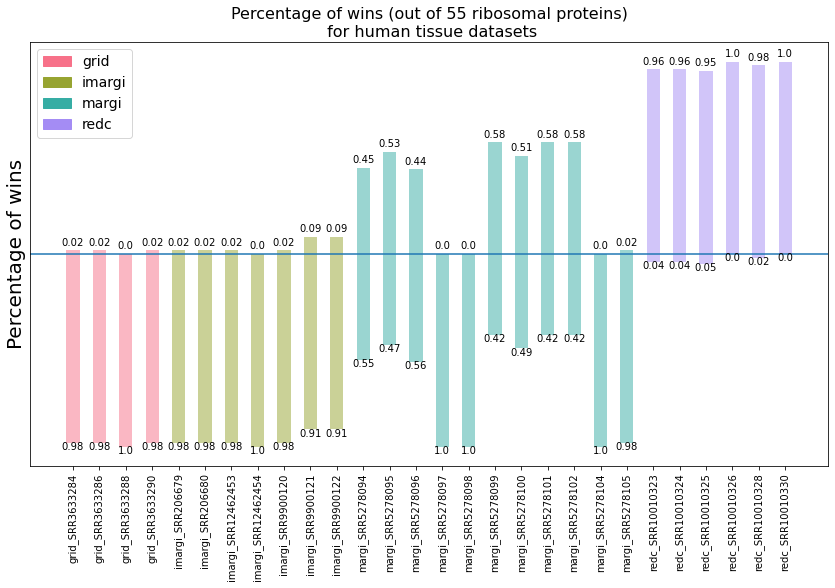

In [14]:
labels = [
    "grid_SRR3633284",
    "grid_SRR3633286",
    "grid_SRR3633288",
    "grid_SRR3633290",
    "imargi_SRR206679",
    "imargi_SRR206680",
    "imargi_SRR12462453",
    "imargi_SRR12462454",
    "imargi_SRR9900120",
    "imargi_SRR9900121",
    "imargi_SRR9900122",
    "margi_SRR5278094",
    "margi_SRR5278095",
    "margi_SRR5278096",
    "margi_SRR5278097",
    "margi_SRR5278098",
    "margi_SRR5278099",
    "margi_SRR5278100",
    "margi_SRR5278101",
    "margi_SRR5278102",
    "margi_SRR5278104",
    "margi_SRR5278105",
    "redc_SRR10010323",
    "redc_SRR10010324",
    "redc_SRR10010325",
    "redc_SRR10010326",
    "redc_SRR10010328",
    "redc_SRR10010330",
]

TOTAL = 55
heights = [.02, .02, .0, .02,
            .02, .02, .02, .0, .02, .09, .09,
            .45, .53, .44, .0, .0, .58, .51, .58, .58, .0, .02,
            .96, .96, .95, 1.0, .98, 1.0]
negheights = [1.0-x for x in heights]
rna_strand_barplot(labels, heights, negheights, TOTAL, "human")

In [4]:
# calc strand
names = ["SRR12462453", "SRR12462454", "SRR9900120", "SRR9900121", "SRR9900122"]
G = DIR + "data/genes/human/gencode.v35.basic.annotation.gtf"
genes = pd.read_csv(G, skiprows=5, sep='\t', header=None)
genes = genes[genes[2] == 'gene']
genes.drop([1,2,5,7], inplace=True, axis=1)
genes.shape

(60656, 5)

In [5]:
ribgenes = genes[genes[8].str.contains('"protein_coding"; gene_name "RPL')]
print(ribgenes.shape[0])
ribgenes[8] = ribgenes[8].apply(lambda x: x.split('gene_name')[1].split(';')[0].split('"')[1])
ribgenes.set_index(8, inplace=True)
ribgenes.head()

55


,0,3,4,6
8,,,,
RPL22,chr1,6185020,6209389,-
RPL11,chr1,23691742,23696835,+
RPL5,chr1,92832013,92841924,+
RPL31,chr2,101002229,101024032,+
RPL37A,chr2,216498825,216579180,+


In [9]:
res = pd.read_csv('~/data/check.tsv', sep='\t', index_col=0)
for x in res.index:
    for y in res.columns:
        res.at[x,y] = [int(x) for x in res.at[x,y].strip("[]").split(",")]
print(res.shape[0])
res.head()

23


,RPL22,RPL11,RPL5,RPL31,RPL37A,RPL32,RPL15,RPL14,RPL29,RPL24,...,RPL36,RPL18A,RPL18,RPL13A,RPL28,RPL3,RPL36A,RPL36A-HNRNPH2,RPL39,RPL10
imargi_SRR8206680,"[40, 281]","[7, 340]","[26, 1093]","[28, 466]","[124, 603]","[7, 771]","[21, 627]","[12, 299]","[7, 187]","[19, 237]",...,"[39, 106]","[6, 825]","[5, 131]","[7, 1085]","[37, 280]","[21, 1189]","[1, 159]","[40, 197]","[5, 319]","[58, 695]"
imargi_SRR8206679,"[120, 612]","[22, 1091]","[59, 3077]","[153, 945]","[263, 10600]","[48, 2391]","[49, 956]","[31, 546]","[15, 876]","[38, 592]",...,"[225, 1121]","[24, 1827]","[39, 1485]","[39, 3366]","[233, 1061]","[140, 3267]","[14, 894]","[186, 985]","[14, 921]","[96, 3130]"
margi_SRR5278096,"[137, 141]","[33, 32]","[31, 31]","[78, 57]","[366, 373]","[54, 39]","[24, 33]","[33, 22]","[12, 74]","[18, 21]",...,"[176, 191]","[62, 81]","[66, 54]","[201, 112]","[198, 185]","[118, 122]","[14, 19]","[68, 58]","[11, 14]","[102, 70]"
margi_SRR5278101,"[19, 26]","[7, 4]","[13, 8]","[16, 17]","[76, 75]","[14, 7]","[9, 3]","[11, 3]","[4, 9]","[2, 7]",...,"[20, 36]","[7, 13]","[12, 2]","[33, 11]","[21, 36]","[18, 21]","[7, 3]","[22, 18]","[3, 9]","[30, 26]"
margi_SRR5278099,"[23, 40]","[10, 6]","[7, 14]","[25, 15]","[70, 73]","[5, 4]","[12, 9]","[15, 8]","[4, 12]","[4, 9]",...,"[40, 47]","[4, 13]","[6, 9]","[39, 23]","[42, 49]","[21, 28]","[16, 0]","[46, 20]","[13, 7]","[37, 33]"


In [ ]:
for name in names:
    dat = pd.read_csv(f'~/data/imargi/bed/{name}.rna.bed', sep='\t', header=None)
    print(name, dat.shape[0])
    dat[0] = dat[0].apply(lambda x: hg38_dict[x])
    for item in ribgenes.index:
        same = dat[(dat[0]==ribgenes.at[item,0]) & (dat[5]==ribgenes.at[item,6]) & (dat[1] < ribgenes.at[item,4]) & (dat[2] > ribgenes.at[item,3])].shape[0]
        anti = dat[(dat[0]==ribgenes.at[item,0]) & (dat[5]!=ribgenes.at[item,6]) & (dat[1] < ribgenes.at[item,4]) & (dat[2] > ribgenes.at[item,3])].shape[0]
        res.at['imargi_'+name,item] = [same, anti]

SRR12462453 5628303


In [ ]:
res.to_csv("~/data/check_new.tsv", sep='\t', index=False)

In [64]:
labels = sorted(res.index.values)

In [65]:
#heights =    np.array([1, 2, 31, 29, 27, 0, 0,33,30,34,33,0,1,1, 1, 0, 1, 53,55,53,54,55,54]) / 55
#negheights = np.array([54,53,24, 26, 38, 3, 5,22,25,21,22,3,8,54,54,55,54,2, 0, 2, 1, 0, 1]) / 55

heights = np.array([res.loc[x,:].T.apply(lambda x: x[0]>x[1]).sum() for x in labels]) / res.columns.shape[0]
negheights = np.array([res.loc[x,:].T.apply(lambda x: x[0]<x[1]).sum() for x in labels]) / res.columns.shape[0]

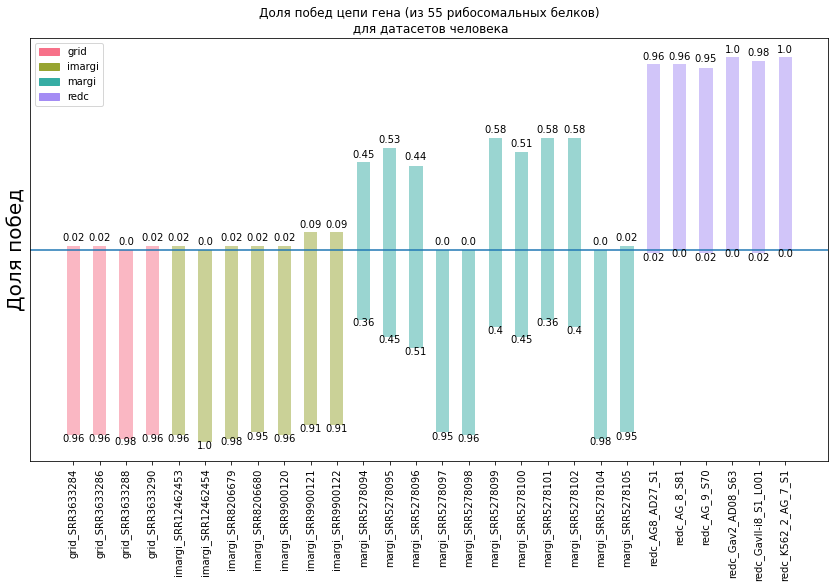

In [68]:
rna_strand_barplot(labels, heights, negheights, 55, 'человека')

# MARGI

In [ ]:
# gzip old margi
os.chdir("/home/asigorskikh/data/margi/raw")
for name in [x for x in os.listdir() if x.endswith(".fastq")]:
    os.system(f"gzip {name} --best")

In [16]:
curdir = DIR + 'data/margi/'
os.chdir(curdir)
#fastuniq and trim already done

In [20]:
#data gunzip
#os.chdir('trimmed')
#for x in [x for x in os.listdir('.') if '.fastq.gz' in x]:
    #os.system('gunzip {}'.format(x))
#os.chdir('..')

In [17]:
names = list(set([x.split('.')[0] for x in os.listdir('trimmed/') if '.fastq' in x]))

In [12]:
os.system('rm trimmed/SRR5278103.*')

0

In [ ]:
#align
for name in names:
    align(infile=curdir+'trimmed/{}.reverse.trimmomatic_output.fastq'.format(name), outfile=curdir+'sam/{}.dna.bam'.format(name),\
         mode='dna', genome=DIR+'data/genomes/hg38/GRCh38.p13', nthreads=8)
    align(infile=curdir+'trimmed/{}.forward.trimmomatic_output.fastq'.format(name), outfile=curdir+'sam/{}.rna.bam'.format(name),\
         mode='rna', genome=DIR+'data/genomes/hg38/GRCh38.p13', nthreads=8,\
         known_splice=DIR+'data/genes/human/gencode.v35.basic.annotation.ss', novel_splice=curdir+'bam/{}.rna.novel_splice'.format(name))

b'13556994 reads; of these:\n  13556994 (100.00%) were unpaired; of these:\n    3636430 (26.82%) aligned 0 times\n    9263230 (68.33%) aligned exactly 1 time\n    657334 (4.85%) aligned >1 times\n73.18% overall alignment rate\n'
b'13556994 reads; of these:\n  13556994 (100.00%) were unpaired; of these:\n    1857405 (13.70%) aligned 0 times\n    11057377 (81.56%) aligned exactly 1 time\n    642212 (4.74%) aligned >1 times\n86.30% overall alignment rate\n'


In [ ]:
for x,y in itertools.product(names, ['rna', 'dna']):
    filter_aligned(curdir+'sam/{0}.{1}.bam'.format(x,y), curdir+'bam/{0}.{1}.bam'.format(x,y))
    aligned_to_bed(infile=curdir+'bam/{0}.{1}.bam'.format(x,y), outfile='/home/asigorskikh/data/margi/bed/{0}.{1}.bed'.format(x,y), mode='mapped')

# RADICL

In [ ]:
# archive already existing
#os.chdir('/home/asigorskikh/data/radicl/fastuniq/')
#for x in [x for x in os.listdir('.') if '.fastq' in x]:
    #os.system('gzip {}'.format(x))

In [2]:
curdir = DIR + 'data/radicl/'
os.chdir(curdir)
rnas = ['SRR'+str(x) for x in range(9201799, 9201831) if x % 2 == 1]
dnas = ['SRR'+str(x) for x in range(9201799, 9201831) if x % 2 == 0]

In [ ]:
#trim
for rna, dna in zip(rnas,dnas):
    
    file1_fastuniq = curdir + 'fastuniq/{}.fastq'.format(rna)
    file2_fastuniq = curdir + 'fastuniq/{}.fastq'.format(dna)
    
    file1_trim = curdir + 'trimmed/{}.fastq'.format(rna)
    file2_trim = curdir + 'trimmed/{}.fastq'.format(dna)

    run_trimmomatic(file1_fastuniq, file2_fastuniq, file1_trim, file2_trim,
                  window=5, 
                  qual_th=26, 
                  minlen=14 
                  )

b'TrimmomaticPE: Started with arguments:\n -phred33 /mnt/scratch/rnachrom/data/radicl/fastuniq/SRR9201799.fastq /mnt/scratch/rnachrom/data/radicl/fastuniq/SRR9201800.fastq /mnt/scratch/rnachrom/data/radicl/trimmed/SRR9201799.fastq /mnt/scratch/rnachrom/data/radicl/trimmed/SRR9201799.fastq.unpaired /mnt/scratch/rnachrom/data/radicl/trimmed/SRR9201800.fastq /mnt/scratch/rnachrom/data/radicl/trimmed/SRR9201800.fastq.unpaired SLIDINGWINDOW:5:26 MINLEN:14\nMultiple cores found: Using 4 threads\nInput Read Pairs: 89981407 Both Surviving: 86756105 (96.42%) Forward Only Surviving: 1185515 (1.32%) Reverse Only Surviving: 1397605 (1.55%) Dropped: 642182 (0.71%)\nTrimmomaticPE: Completed successfully\n'


In [ ]:
for rna, dna in zip(rnas, dnas):
    align(infile=curdir+'trimmed/'+dna+'.fastq', outfile=curdir+'sam/'+dna+'.dna.bam',\
          mode='dna', genome=DIR+'data/genomes/mm10/GRCm38.p6', nthreads=8)
    align(infile=curdir+'trimmed/'+rna+'.fastq', outfile=curdir+'sam/'+rna+'.rna.bam',\
          mode='rna', genome=DIR+'data/genomes/mm10/GRCm38.p6', nthreads=8,\
          known_splice='data/genes/mouse/gencode.vM25.basic.annotation.ss', novel_splice=curdir+'bam/'+rna+'.novel_splice')

b'86756105 reads; of these:\n  86756105 (100.00%) were unpaired; of these:\n    15451575 (17.81%) aligned 0 times\n    60288890 (69.49%) aligned exactly 1 time\n    11015640 (12.70%) aligned >1 times\n82.19% overall alignment rate\n'
b'86756105 reads; of these:\n  86756105 (100.00%) were unpaired; of these:\n    30265574 (34.89%) aligned 0 times\n    32166096 (37.08%) aligned exactly 1 time\n    24324435 (28.04%) aligned >1 times\n65.11% overall alignment rate\n'


In [ ]:
for rna, dna in zip(rnas, dnas):
    filter_aligned(infile=curdir+'sam/'+rna+'.rna.bam', outfile=curdir+'bam/'+rna+'.rna.bam')
    filter_aligned(infile=curdir+'sam/'+dna+'.dna.bam', outfile=curdir+'bam/'+dna+'.dna.bam')
    aligned_to_bed(infile=curdir+'bam/'+rna+'.rna.bam', outfile='/home/asigorskikh/data/radicl/bed/'+rna+'.rna.bed', mode='mapped')
    aligned_to_bed(infile=curdir+'bam/'+dna+'.dna.bam', outfile='/home/asigorskikh/data/radicl/bed/'+dna+'.dna.bed', mode='mapped')

In [20]:
#stats
for name in rnas:
    os.system("awk '{s++}END{print s/4}' trimmed/" + name + ".fastq >> trimstats.txt")

# CHAR

In [ ]:
#changes SE trimming script and added PE trimming before mapping

In [17]:
curdir = DIR + 'data/char/'
os.chdir(curdir)
names = ['SRR5382172', 'SRR5382173', 'SRR5382174', 'SRR5382175', 'SRR5382176']

In [24]:
for name in names:
    os.system("cp /home/asigorskikh/data/char/sra/{0}.fastq.gz /mnt/scratch/rnachrom/data/char/{0}/".format(name))

In [29]:
for name in names:
    os.system("rm {0}/trim/*.gz".format(name))
    os.system("rm {0}/bridge/*.gz".format(name))

In [ ]:
#bridge
for name in names:
#for name in ['SRR5382175']:
    run_command('./char_prep.sh /mnt/scratch/rnachrom/data/char/{0}/{0}.fastq.gz /mnt/scratch/rnachrom/data/char 8'.format(name))

In [20]:
for name in names:
#for name in ['SRR5382175']:
    file1_fastuniq = curdir + 'fastuniq/{}.dna.bridgePE.fastq'.format(name)
    file2_fastuniq = curdir + 'fastuniq/{}.rna.bridgePE.fastq'.format(name)
    
    file1_trim = curdir + 'trimmed/{}.dna.fastq'.format(name)
    file2_trim = curdir + 'trimmed/{}.rna.fastq'.format(name)

    run_trimmomatic(file1_fastuniq, file2_fastuniq, file1_trim, file2_trim,
                  window=5, 
                  qual_th=26, 
                  minlen=14 
                  )

b'TrimmomaticPE: Started with arguments:\n -phred33 /mnt/scratch/rnachrom/data/char/fastuniq/SRR5382172.dna.bridgePE.fastq /mnt/scratch/rnachrom/data/char/fastuniq/SRR5382172.rna.bridgePE.fastq /mnt/scratch/rnachrom/data/char/trimmed/SRR5382172.dna.fastq /mnt/scratch/rnachrom/data/char/trimmed/SRR5382172.dna.fastq.unpaired /mnt/scratch/rnachrom/data/char/trimmed/SRR5382172.rna.fastq /mnt/scratch/rnachrom/data/char/trimmed/SRR5382172.rna.fastq.unpaired SLIDINGWINDOW:5:26 MINLEN:14\nMultiple cores found: Using 4 threads\nInput Read Pairs: 7098165 Both Surviving: 5291526 (74.55%) Forward Only Surviving: 754453 (10.63%) Reverse Only Surviving: 637722 (8.98%) Dropped: 414464 (5.84%)\nTrimmomaticPE: Completed successfully\n'
b'TrimmomaticPE: Started with arguments:\n -phred33 /mnt/scratch/rnachrom/data/char/fastuniq/SRR5382173.dna.bridgePE.fastq /mnt/scratch/rnachrom/data/char/fastuniq/SRR5382173.rna.bridgePE.fastq /mnt/scratch/rnachrom/data/char/trimmed/SRR5382173.dna.fastq /mnt/scratch/rna

In [ ]:
for name in names:
    align(infile=curdir+'trimmed/{}.dna.fastq'.format(name), outfile=curdir+'sam/{}.dna.bam'.format(name),\
         mode='dna', genome=DIR+'data/genomes/dm6/dm6', nthreads=8)
    align(infile=curdir+'trimmed/{}.rna.fastq'.format(name), outfile=curdir+'sam/{}.rna.bam'.format(name),\
         mode='rna', genome=DIR+'data/genomes/dm6/dm6', nthreads=8,\
         known_splice=DIR+'data/genes/drosophila/splicesites.txt', novel_splice=curdir+'sam/{}.rna.novel_splice'.format(name))

b'5291526 reads; of these:\n  5291526 (100.00%) were unpaired; of these:\n    1187595 (22.44%) aligned 0 times\n    3212892 (60.72%) aligned exactly 1 time\n    891039 (16.84%) aligned >1 times\n77.56% overall alignment rate\n'
b'5291526 reads; of these:\n  5291526 (100.00%) were unpaired; of these:\n    1499570 (28.34%) aligned 0 times\n    1097774 (20.75%) aligned exactly 1 time\n    2694182 (50.92%) aligned >1 times\n71.66% overall alignment rate\n'
b'11325211 reads; of these:\n  11325211 (100.00%) were unpaired; of these:\n    2737045 (24.17%) aligned 0 times\n    6810766 (60.14%) aligned exactly 1 time\n    1777400 (15.69%) aligned >1 times\n75.83% overall alignment rate\n'
b'11325211 reads; of these:\n  11325211 (100.00%) were unpaired; of these:\n    2204481 (19.47%) aligned 0 times\n    1889774 (16.69%) aligned exactly 1 time\n    7230956 (63.85%) aligned >1 times\n80.53% overall alignment rate\n'
b'2074008 reads; of these:\n  2074008 (100.00%) were unpaired; of these:\n    665

In [ ]:
for x,y in itertools.product(names, ['rna', 'dna']):
    filter_aligned(curdir+'sam/{0}.{1}.bam'.format(x,y), curdir+'bam/{0}.{1}.bam'.format(x,y))
    aligned_to_bed(infile=curdir+'bam/{0}.{1}.bam'.format(x,y), outfile='/home/asigorskikh/data/char/bed/{0}.{1}.bed'.format(x,y), mode='mapped')